### 彩电生产问题

In [1]:
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

In [2]:
x1, x2 = sp.var('x1, x2', pos=True)
p1 = 339 - 0.01*x1 - 0.003*x2
p2 = 399 - 0.004*x1 - 0.01*x2
c = 400000 + 195*x1 + 225*x2
r = p1*x1 + p2*x2
y = r - c
y = y.simplify()
y

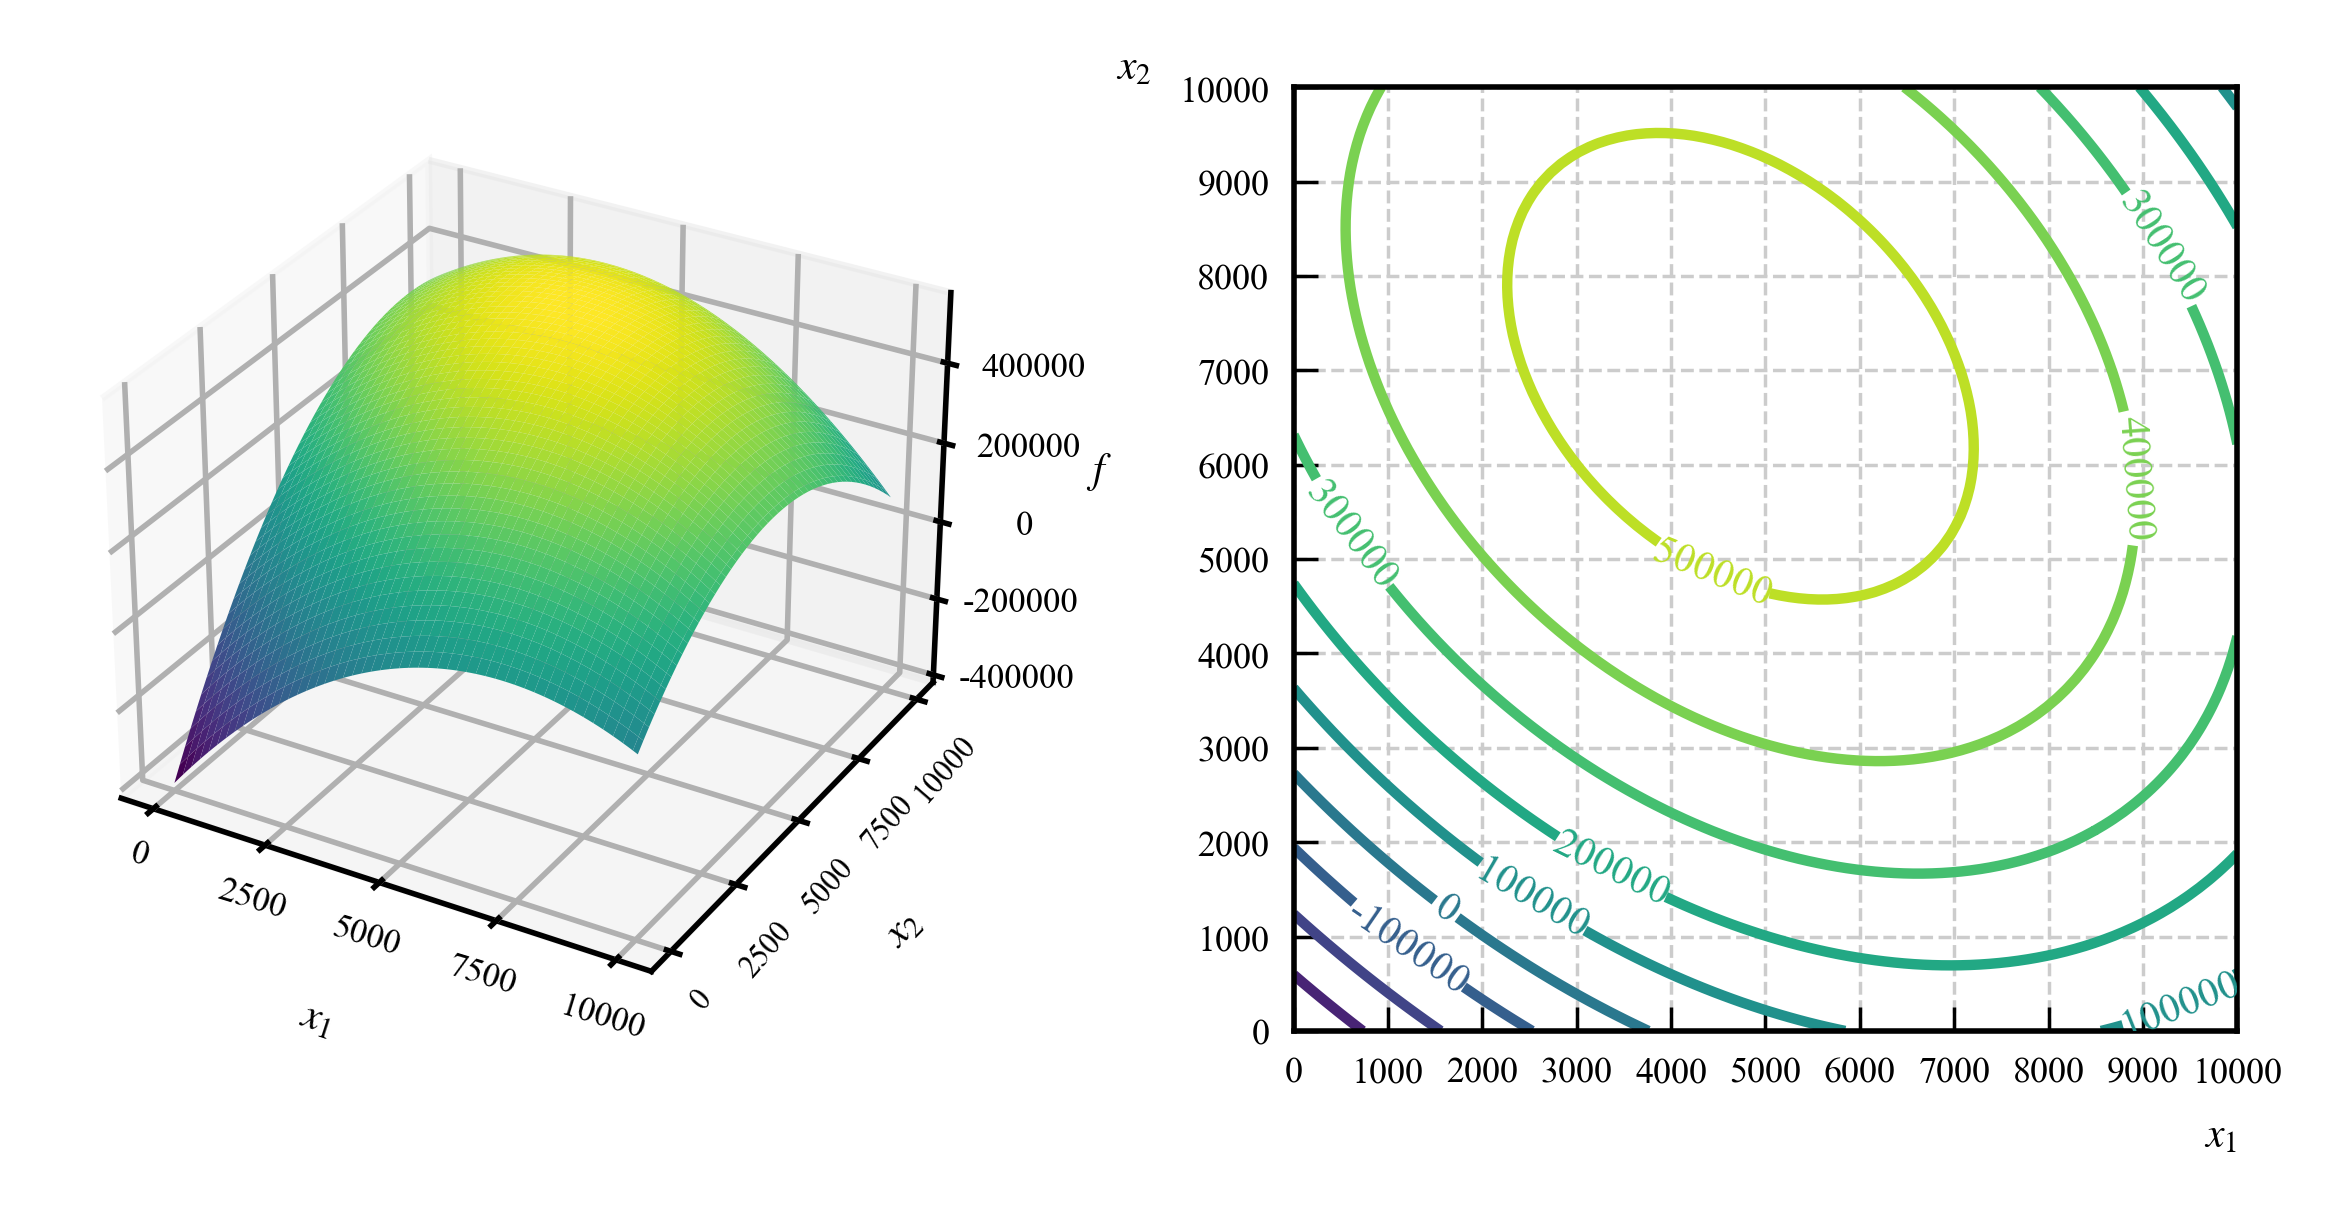

In [3]:
x = np.linspace(0, 10000, 100)
X, Y = np.meshgrid(x, x)
f = sp.lambdify('x1, x2', y, 'numpy')
Z = f(X, Y)

fig = plt.figure(dpi=500, figsize=(6, 2.5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('$x_1$', fontsize=6, labelpad=-7)
ax.set_ylabel('$x_2$', fontsize=6, labelpad=-7)
ax.set_zlabel('$f$', fontsize=6, labelpad=-7)
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_major_locator(MultipleLocator(2500))
ax.yaxis.set_major_locator(MultipleLocator(2500))
ax.tick_params(which='major', width=0.5, labelsize=5, axis='z', pad=-0.5)
ax.tick_params(which='major', width=0.5, labelsize=5, axis='x', pad=-5, rotation=-17)
ax.tick_params(which='major', width=0.5, labelsize=4.5, axis='y', pad=-4, rotation=49)

ax1 = fig.add_subplot(122)
contr = ax1.contour(X, Y, Z, 10, cmap='viridis')
ax1.clabel(contr, fontsize=6)
ax1.set_xlabel('$x_1$', fontsize=6, loc='right')
ax1.set_ylabel('$x_2$', fontsize=6, loc='top', rotation=0)
ax1.set_box_aspect(1)
ax1.xaxis.set_major_locator(MultipleLocator(1000))
ax1.yaxis.set_major_locator(MultipleLocator(1000))
ax1.tick_params(which='major', width=0.5, labelsize=5.2)
ax1.grid(linestyle='--', color='0.8', linewidth=0.5)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=None)
fig.show()

In [4]:
dfdx1 = y.diff(x1)
dfdx2 = y.diff(x2)
xs = sp.solve([dfdx1, dfdx2], [x1, x2])
x1max = round(float(xs[x1]))
x2max = round(float(xs[x2]))
ymax = y.subs({x1: x1max, x2: x2max})
ymax

### 灵敏度分析

In [5]:
a = sp.var('a', pos=True)
y = (339-a*x1-.003*x2)*x1 + (399-.004*x1-.01*x2)*x2 - (400000+195*x1+225*x2)
y = y.simplify()
y

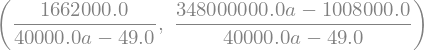

In [6]:
dfdx1 = y.diff(x1)
dfdx2 = y.diff(x2)
xs = sp.solve([dfdx1, dfdx2], [x1, x2])
x1maxa, x2maxa = xs[x1], xs[x2]
x1maxa, x2maxa

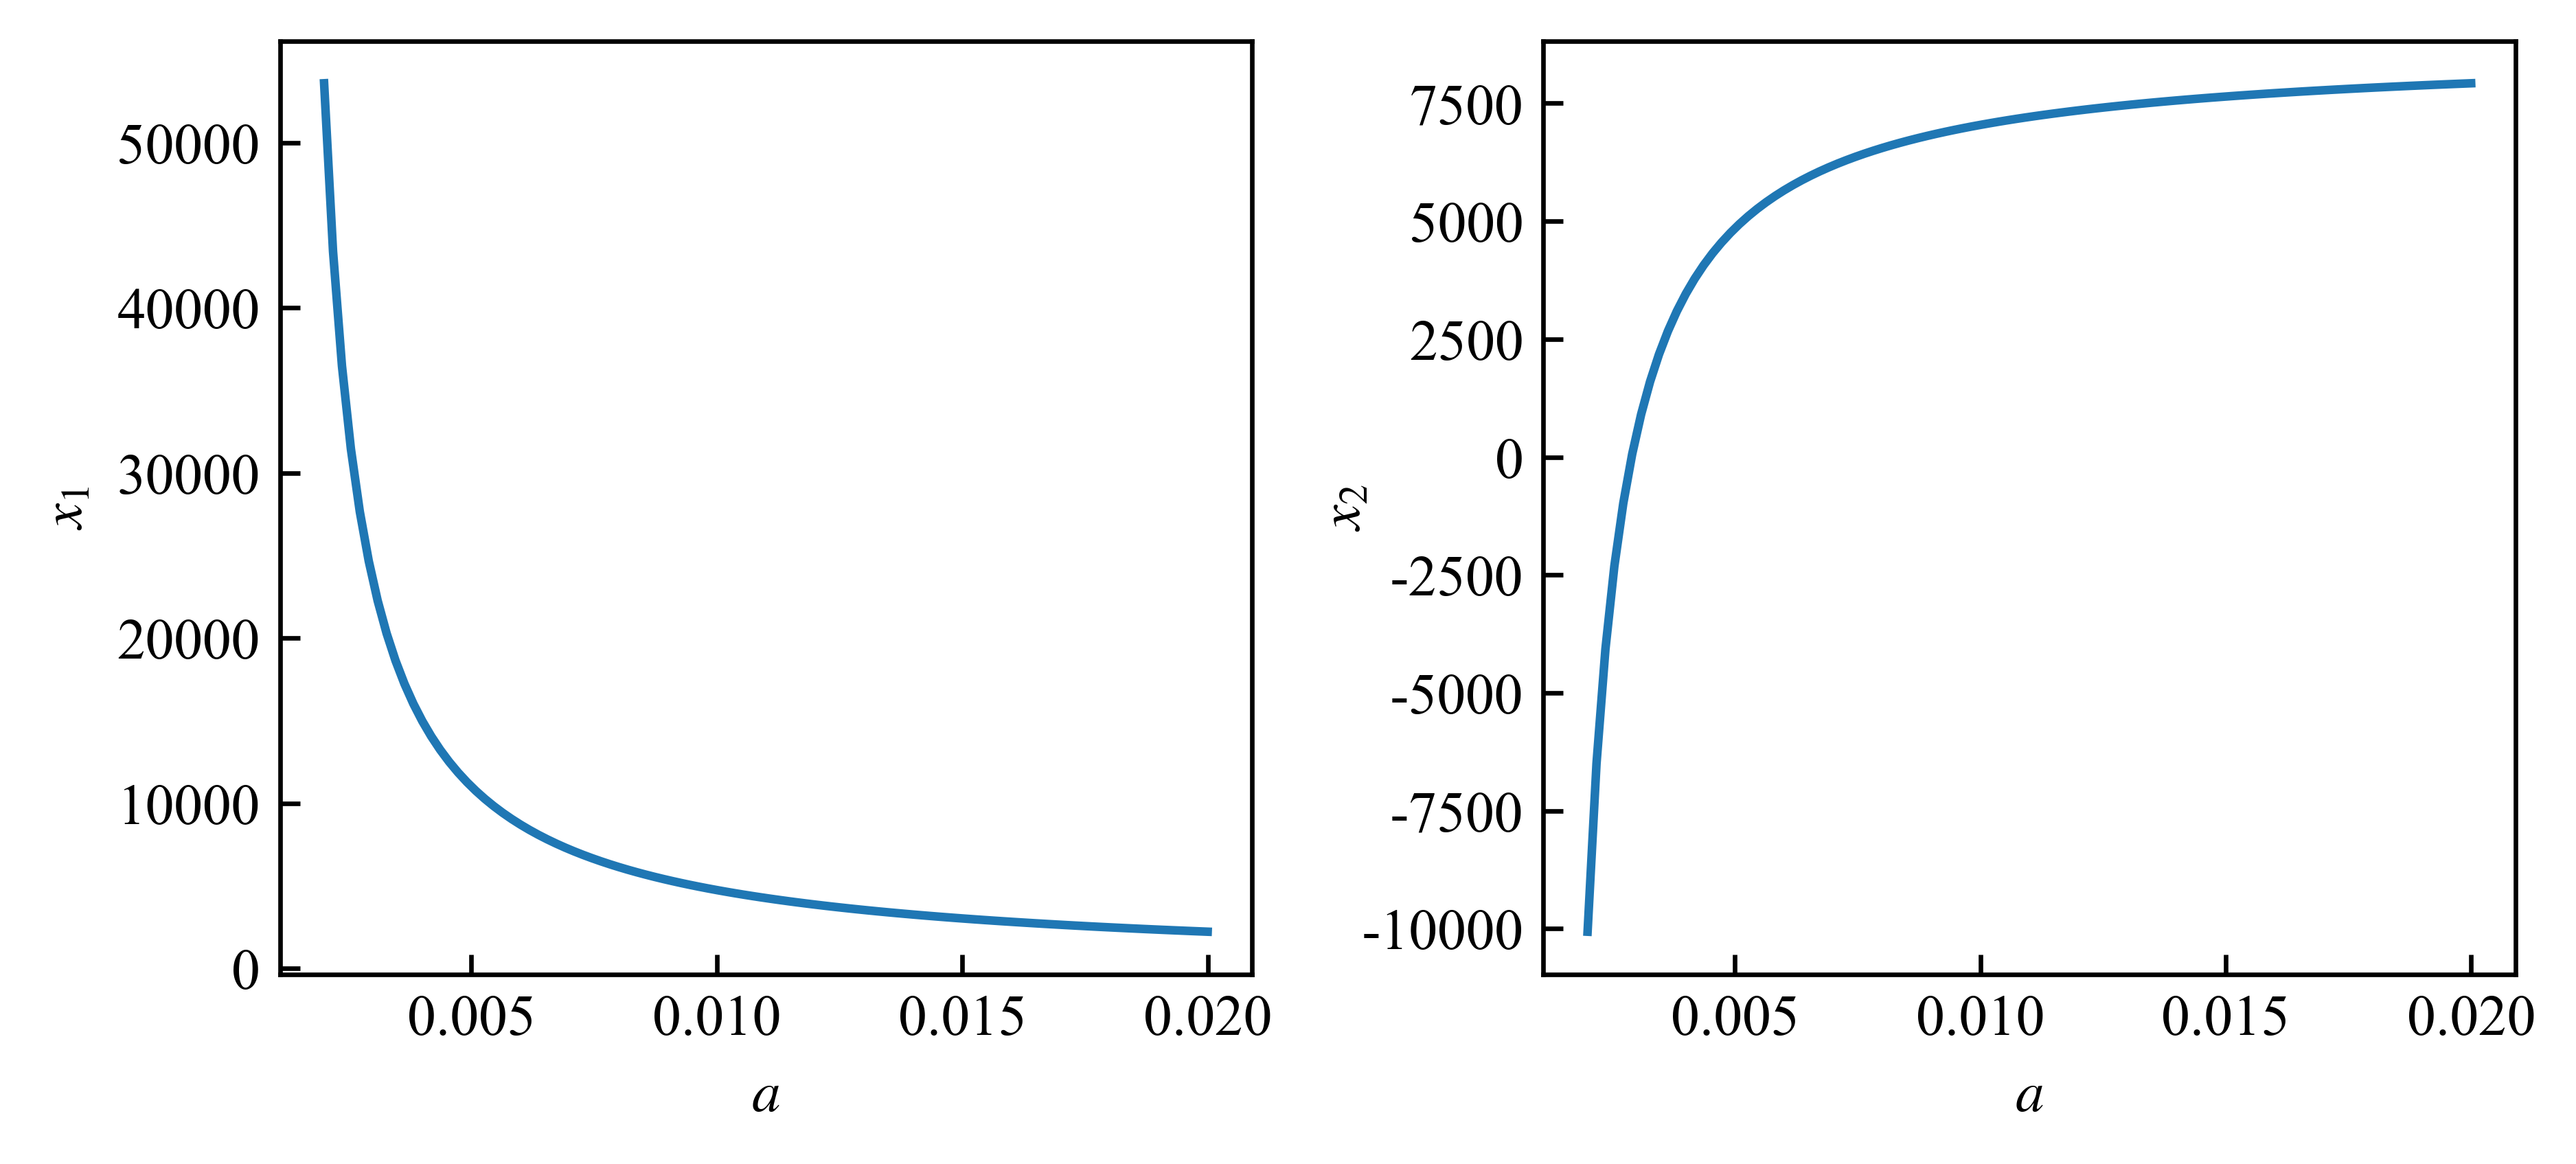

In [7]:
A = np.linspace(0.002, 0.02, 100)
X1MAXA = sp.lambdify('a', x1maxa, 'numpy')
X1 = X1MAXA(A)
X2MAXA = sp.lambdify('a', x2maxa, 'numpy')
X2 = X2MAXA(A)

fig = plt.figure(dpi=600, figsize=(7, 3))
ax = fig.add_subplot(121)
ax.plot(A, X1)
ax.set_xlabel('$a$')
ax.set_ylabel('$x_1$')

ax1 = fig.add_subplot(122)
ax1.plot(A, X2)
ax1.set_xlabel('$a$')
ax1.set_ylabel('$x_2$', labelpad=-2)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
fig.show()

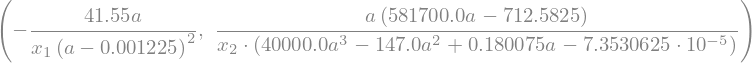

In [8]:
dx1da = sp.diff(x1maxa, a)
dx2da = sp.diff(x2maxa, a)
sx1a = dx1da*(a/x1)
sx2a = dx2da*(a/x2)
sx1a.simplify(), sx2a.simplify()

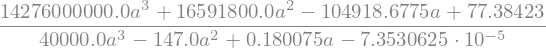

In [9]:
ya = y.subs({x1: x1maxa, x2:x2maxa})
ya.simplify()

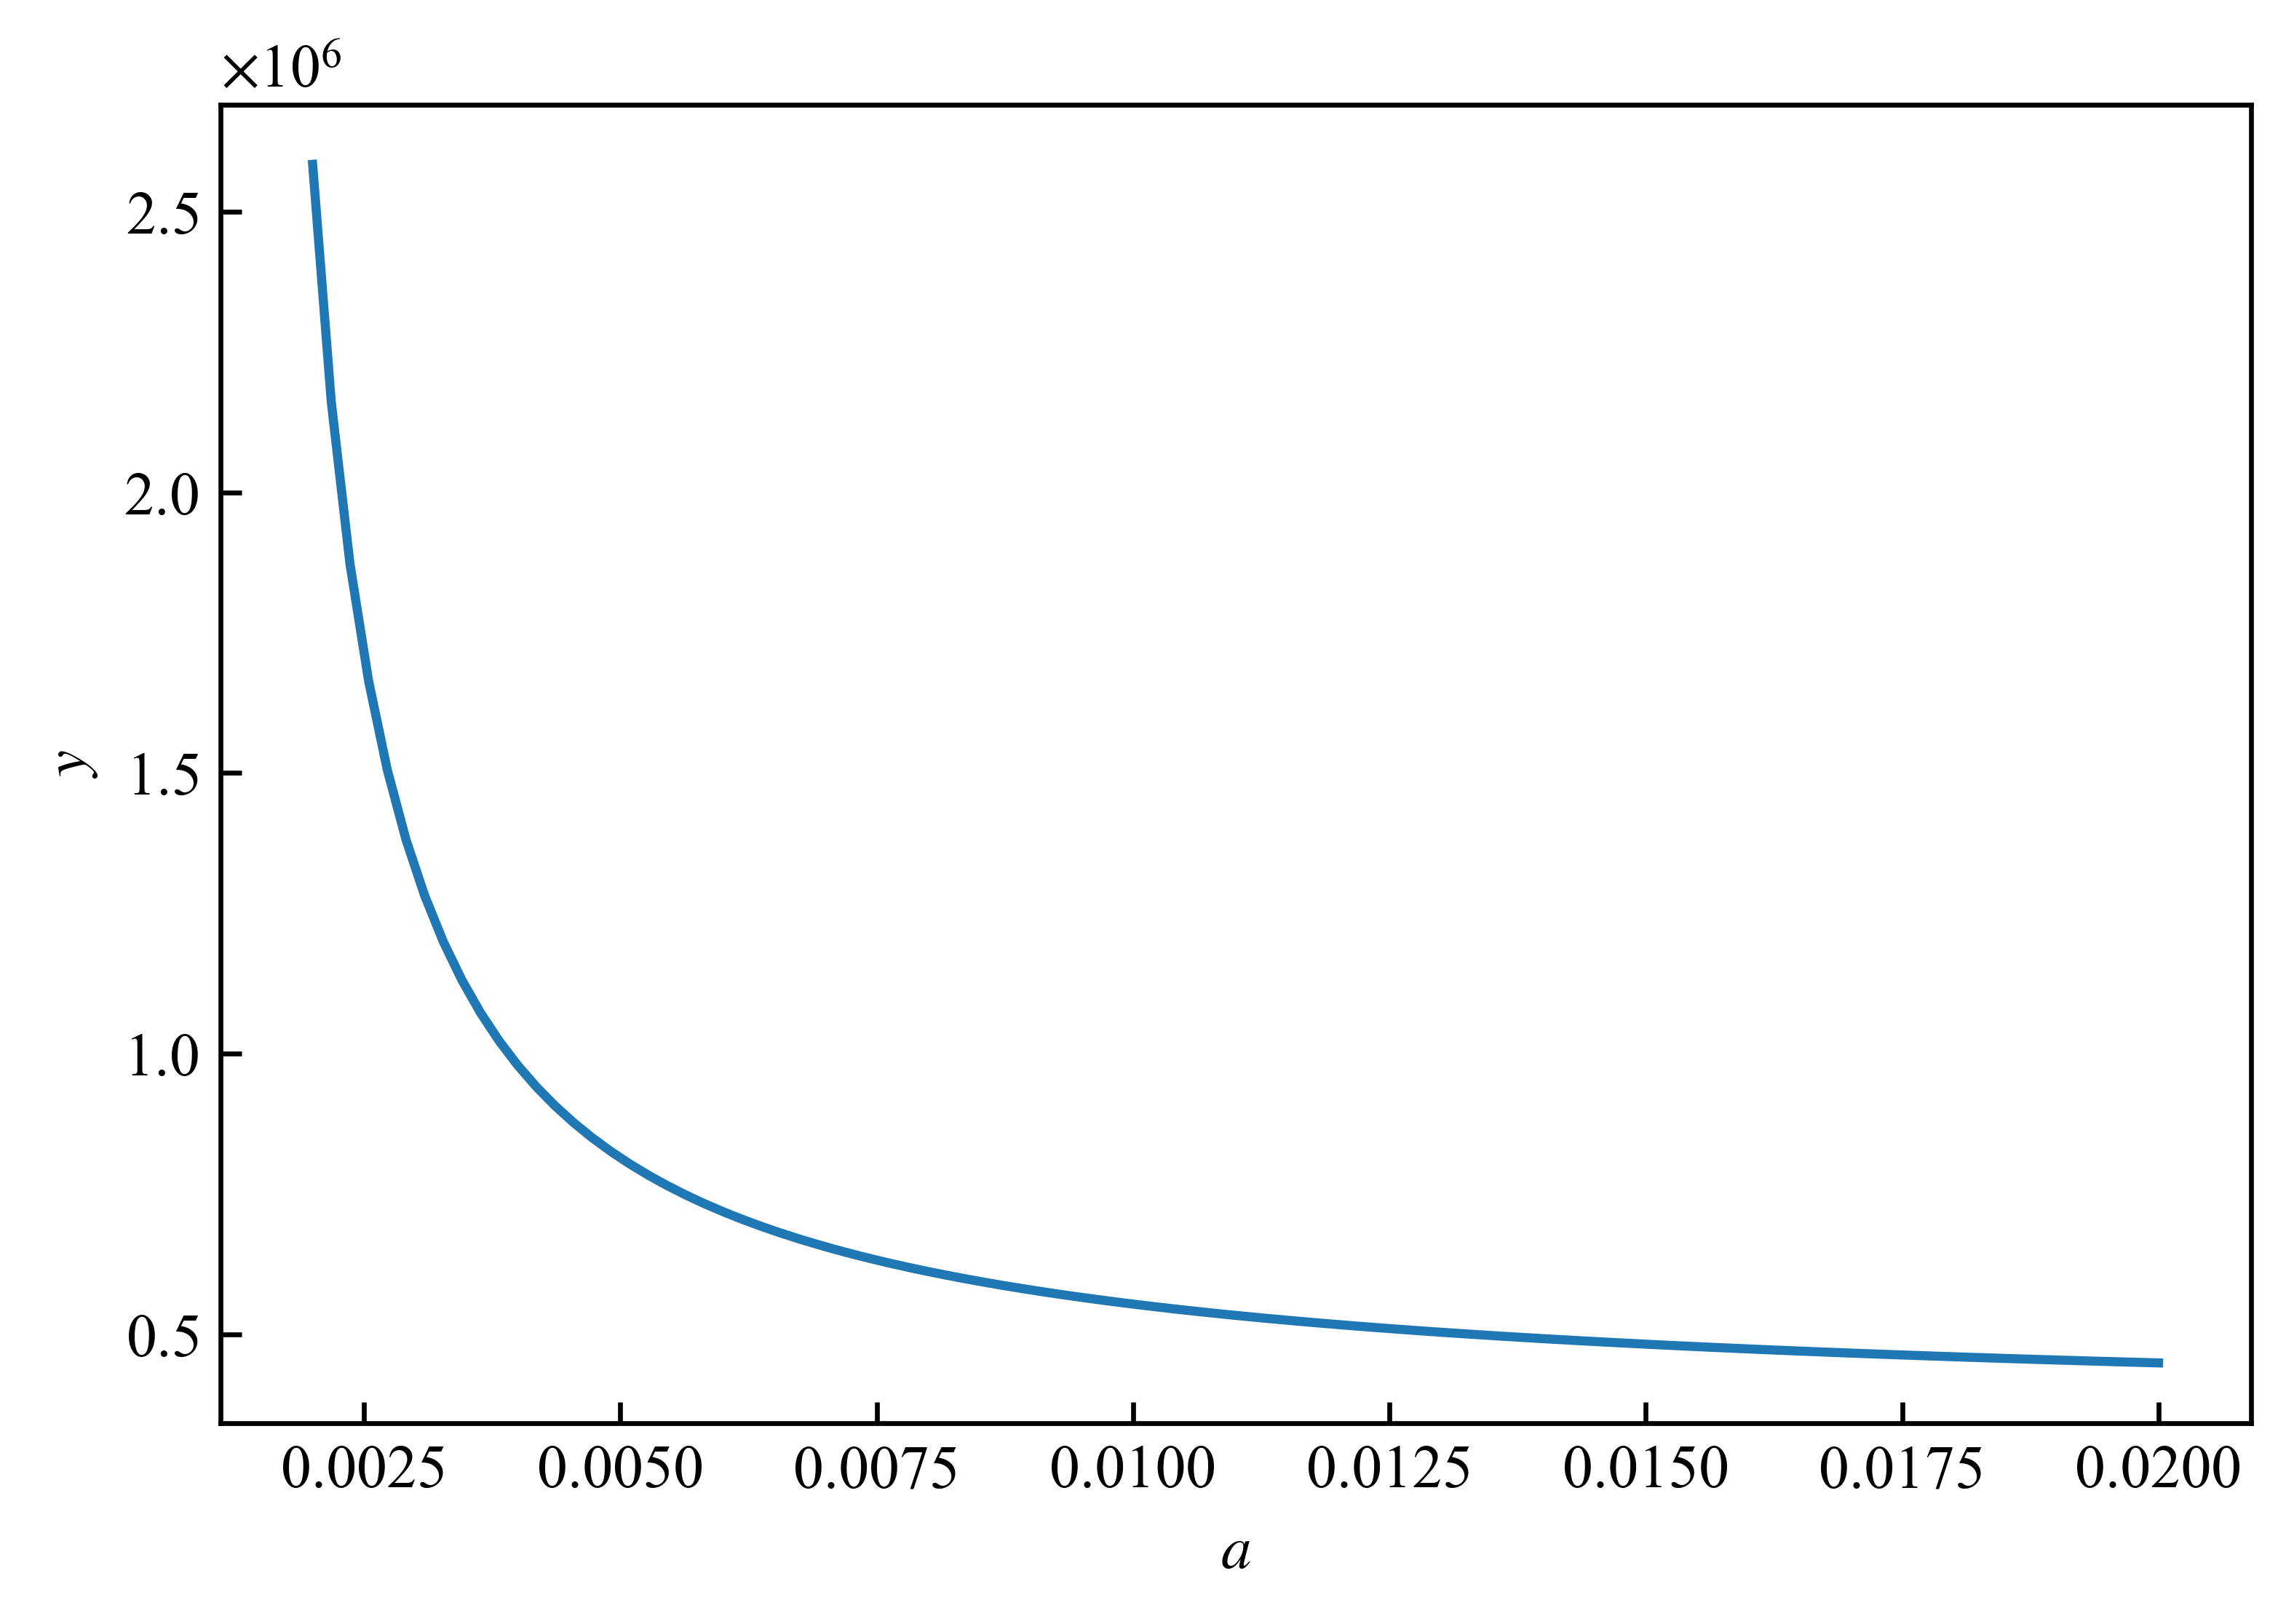

In [10]:
A = np.linspace(0.002, 0.02, 100)
YA = sp.lambdify('a',ya, 'numpy')
Y = YA(A)

fig = plt.figure(dpi=600)
ax = fig.add_subplot()
ax.plot(A, Y)
ax.set_xlabel('$a$')
ax.set_ylabel('$y$')
ax.ticklabel_format(style='sci', scilimits=(0,0), axis='y', useMathText=True)

fig.show()

In [11]:
delta = y.subs({x1: x1max, x2: x2max, a:0.011}) - ya.subs(a, 0.011)
-delta / ya.subs(a, 0.011) * 100

> 当 $a=0.011$，若仍按 $a=0.010$ 的情况安排生产，所获利润仅比可能获得的最有利润损失了 $0.43\%$
> 
> 在这一意义下，我们的模型显示了非常好的稳健性